In [1]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 


In [2]:
#http://stackoverflow.com/questions/17978092/combine-date-and-time-columns-using-python-pandas
df_plug = pd.read_csv(r'C:\Users\piush\Downloads\ESB Hack\Consumer Datasets\plug_usage_X04_feb7_sep7.csv',parse_dates=[['Date', 'Time']])
print ('\n Data Types:')
print (df_plug.dtypes)


 Data Types:
Date_Time      datetime64[ns]
devId                  object
pDevId                 object
pDevTstmp               int64
sampleValue           float64
dtype: object


In [3]:
df_usage = pd.read_csv(r'C:\Users\piush\Downloads\ESB Hack\Consumer Datasets\usage_X04_feb7_sep7.csv',parse_dates=[['Date', 'Time']])
print ('\n Data Types:')
print (df_usage.dtypes)


 Data Types:
Date_Time      datetime64[ns]
devId                  object
pDevId                 object
pDevTstmp               int64
sampleValue           float64
dtype: object


In [4]:
df_plug.head(3)

,Date_Time,devId,pDevId,pDevTstmp,sampleValue
0,2016-07-02 00:00:14,X04,zwave.189af5a.2.20132-0,1454803214,0.281
1,2016-07-02 00:05:14,X04,zwave.189af5a.2.20132-0,1454803514,0.281
2,2016-07-02 00:10:14,X04,zwave.189af5a.2.20132-0,1454803814,0.281


In [5]:
df_usage.head(3)

,Date_Time,devId,pDevId,pDevTstmp,sampleValue
0,2016-07-02 00:00:00,X04,zwave.189af5a.2.10132-0,1454803200,1364.489
1,2016-07-02 00:05:00,X04,zwave.189af5a.2.10132-0,1454803500,1364.512
2,2016-07-02 00:10:00,X04,zwave.189af5a.2.10132-0,1454803800,1364.535


#### There is seconds lag in the plug data , let us normalize the Date_Time. 

In [20]:
print ("USAGE SET INFORMATION")

print('Shape') 
print(df_usage.shape)

print ("========================\n")

print('Describe') 
print(df_usage.describe())

print ("========================\n")
import re
missing_values = []
nonumeric_values = []



for column in df_usage:
    # Find all the unique feature values
    uniq = df_usage[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

USAGE SET INFORMATION
Shape
(58641, 5)

Describe
          pDevTstmp   sampleValue
count  5.864100e+04  58641.000000
mean   1.463978e+09   2501.283024
std    5.370944e+06    620.678208
min    1.454803e+09   1364.489000
25%    1.459243e+09   1954.495000
50%    1.464046e+09   2551.256000
75%    1.468630e+09   3041.280000
max    1.473289e+09   3521.212000

'Date_Time' has 58638 unique values
~~Listing up to 10 unique values~~
['2016-07-02T00:00:00.000000000' '2016-07-02T00:05:00.000000000'
 '2016-07-02T00:10:00.000000000' '2016-07-02T00:15:00.000000000'
 '2016-07-02T00:20:00.000000000' '2016-07-02T00:25:00.000000000'
 '2016-07-02T00:30:00.000000000' '2016-07-02T00:35:00.000000000'
 '2016-07-02T00:40:00.000000000' '2016-07-02T00:45:00.000000000']

-----------------------------------------------------------------------

'devId' has 1 unique values
['X04']

-----------------------------------------------------------------------

'pDevId' has 1 unique values
['zwave.189af5a.2.10132-0']

-----

In [21]:
print ("PLUG SET INFORMATION")

print('Shape') 
print(df_plug.shape)

print ("========================\n")

print('Describe') 
print(df_plug.describe())

print ("========================\n")
import re
missing_values = []
nonumeric_values = []



for column in df_plug:
    # Find all the unique feature values
    uniq = df_plug[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

PLUG SET INFORMATION
Shape
(100478, 5)

Describe
          pDevTstmp    sampleValue
count  1.004780e+05  100478.000000
mean   1.464393e+09      28.584982
std    5.294480e+06     112.797667
min    1.454803e+09       0.000000
25%    1.459857e+09       0.281000
50%    1.464679e+09       0.281000
75%    1.468989e+09      22.552000
max    1.473289e+09    1048.576000

'Date_Time' has 92325 unique values
~~Listing up to 10 unique values~~
['2016-07-02T00:00:14.000000000' '2016-07-02T00:05:14.000000000'
 '2016-07-02T00:10:14.000000000' '2016-07-02T00:15:14.000000000'
 '2016-07-02T00:20:14.000000000' '2016-07-02T00:25:14.000000000'
 '2016-07-02T00:30:14.000000000' '2016-07-02T00:35:14.000000000'
 '2016-07-02T00:40:14.000000000' '2016-07-02T00:45:14.000000000']

-----------------------------------------------------------------------

'devId' has 1 unique values
['X04']

-----------------------------------------------------------------------

'pDevId' has 6 unique values
['zwave.189af5a.2.20132-0

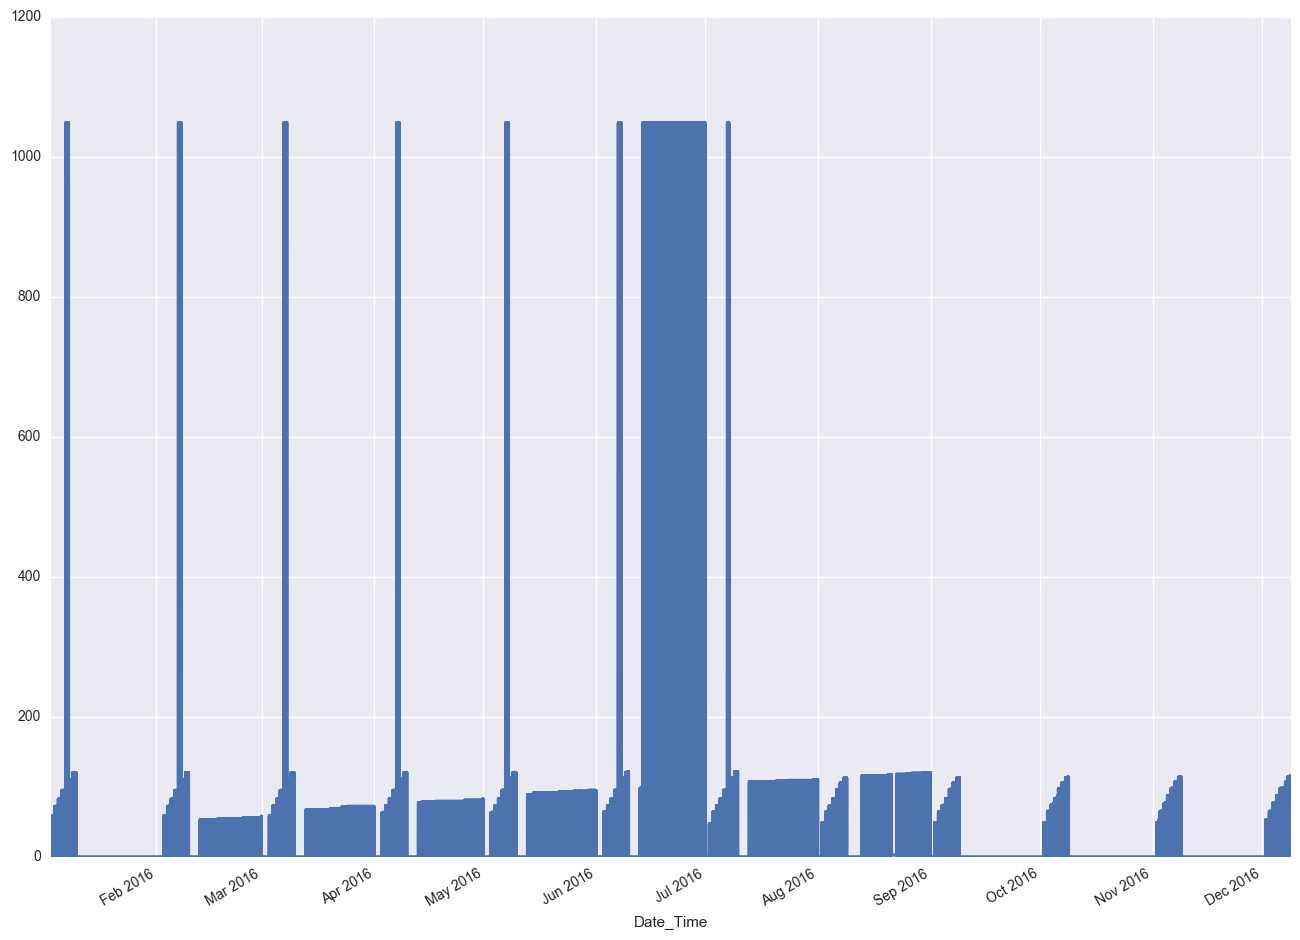

In [6]:
df_plug = df_plug.set_index('Date_Time')

df_plug['sampleValue'].plot(figsize=(16, 12))

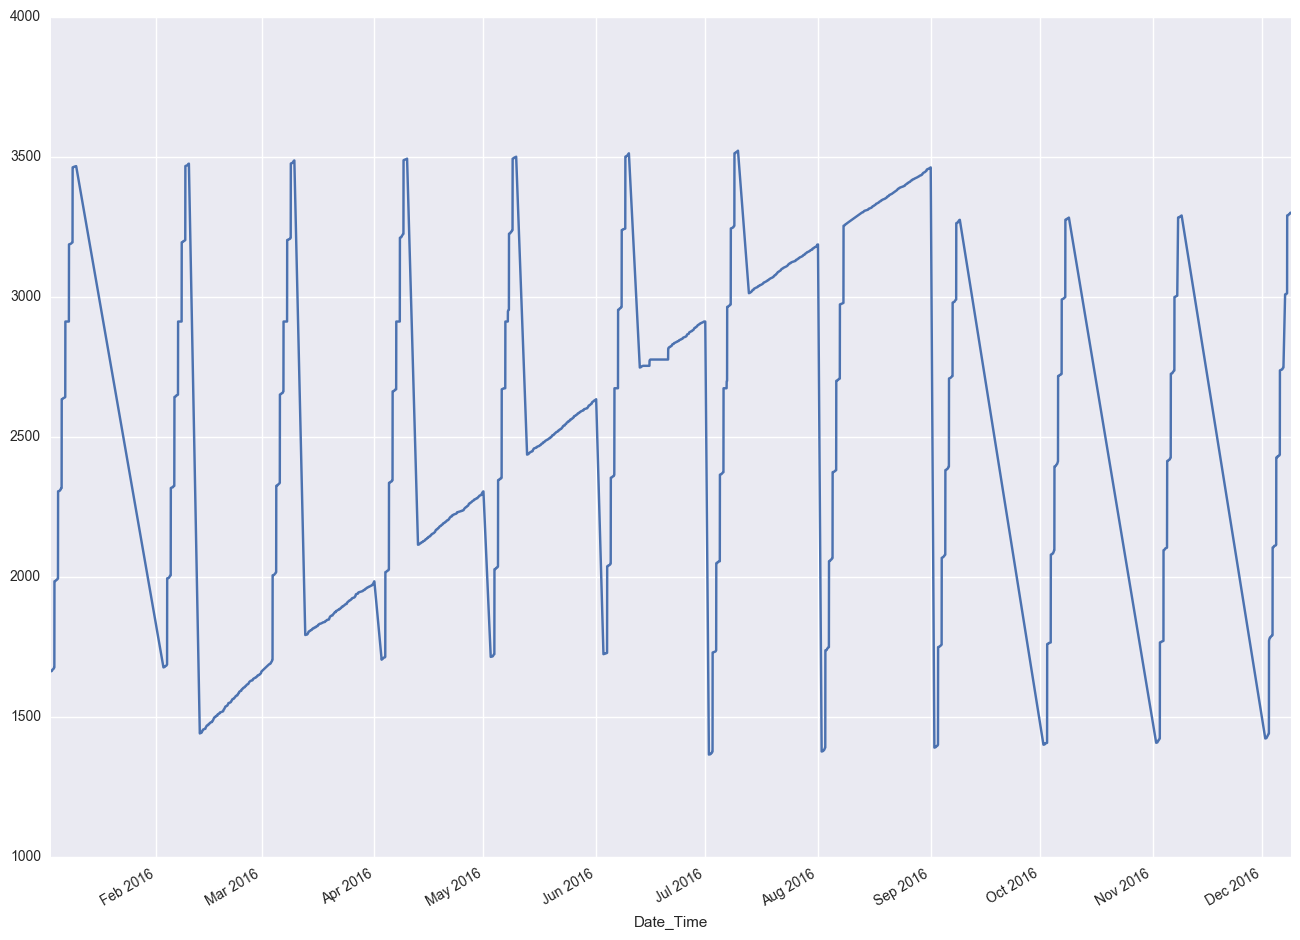

In [7]:
df_usage = df_usage.set_index('Date_Time')
df_usage['sampleValue'].plot(figsize = (16,12))

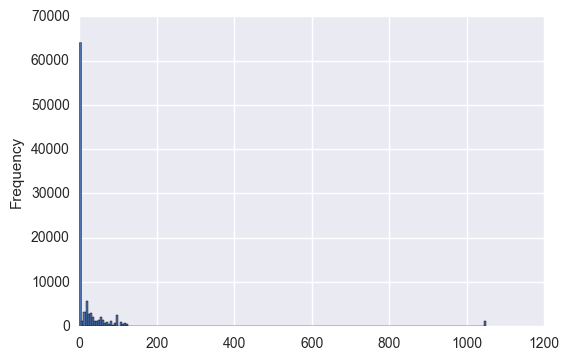

In [8]:
df_plug.sampleValue.plot(kind = "hist",bins = 200)

There is an outlier , Plus all the values are from left.

In [9]:
df_plug = df_plug[(df_plug['sampleValue']!= 1048.576000) & (df_plug['sampleValue'] != 0)]

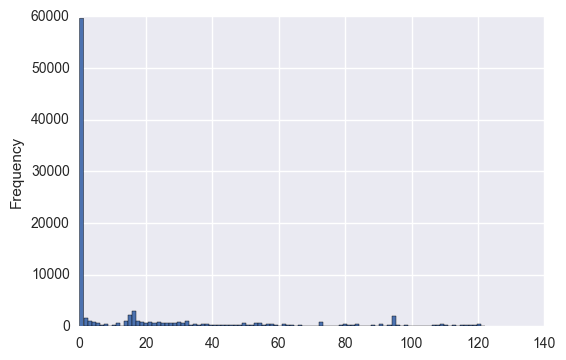

In [13]:
df_plug.sampleValue.plot(kind = "hist",bins = 100)

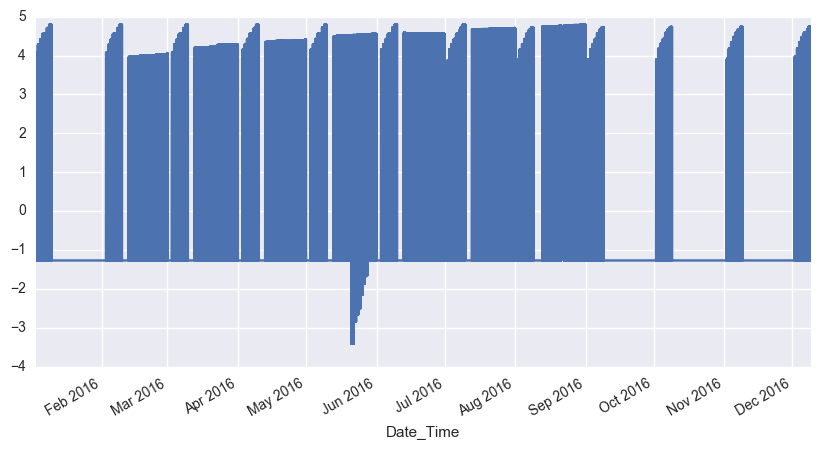

In [14]:
df_plug['Natural_Log'] = df_plug['sampleValue'].apply(lambda x: np.log(x))  
df_plug['Natural_Log'].plot(figsize=(10, 5))   


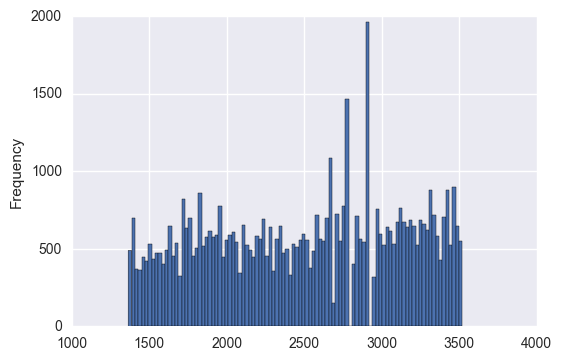

In [44]:
df_usage.sampleValue.plot(kind = "hist",bins = 100)